In [1]:
import pandas as pd

df = pd.read_csv('normalized_feature_set.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35148 entries, 0 to 35147
Data columns (total 11 columns):
indicator_types.value                                35148 non-null object
kill_chain_phases.kill_chain_phases.ordinality       35148 non-null float64
ip_score                                             35148 non-null float64
url_score                                            35148 non-null float64
observable.object.properties.hashes.type.value       35148 non-null int64
observable.object.properties.header.subject.value    35148 non-null int64
observable.object.properties.size_in_bytes.value     35148 non-null float64
tlp_marking_color                                    35148 non-null object
target                                               35148 non-null object
hash_score                                           35148 non-null float64
file_type                                            35148 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 2.9+ MB


In [2]:
feature_list = ['kill_chain_phases.kill_chain_phases.ordinality',
                'ip_score',
                'url_score',
                'observable.object.properties.hashes.type.value',
                'observable.object.properties.header.subject.value',
                'observable.object.properties.size_in_bytes.value',
                'hash_score',
                'file_type'
               ]
X = df[feature_list]
Y = df['indicator_types.value']

In [3]:
from sklearn.preprocessing import StandardScaler

X = X.as_matrix(columns = feature_list)
X = StandardScaler().fit_transform(X)

In [49]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from tqdm import tqdm

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
#bandwidth = estimate_bandwidth(X, quantile=0.2)

ms = MeanShift(bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

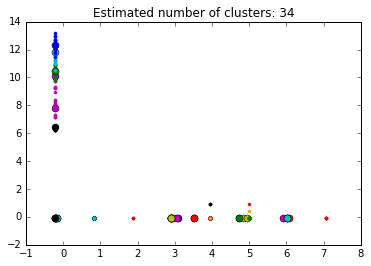

In [63]:
import numpy as np

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 6], col + '.')
    plt.plot(cluster_center[0], cluster_center[6], '.', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [47]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 34


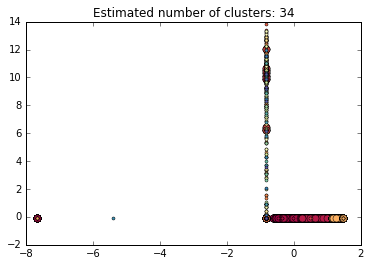

In [55]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 6], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 6], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()